# Une Application de la théorie des graphes

## C'est quoi un graph et comment les representent t-on?

<p>Un graph est une modélisation des objects connectés. Elle est constitué de deux éléments principal : Les noeux et les arcs, Les noeux designe les sommets connectés ou non à d'autre sommets tandis qu'un arc est la connection entre deux noeuds.<br> Il y a deux maniére de représenter le reseau : Sous forme de liste ou sous forme de matrix adjacent où les lignes et les colonnes représente les noeux du reseau et les éléments de la matrix ne prendre que les 0 (Indiquant que noeux de la ligne $i$ n'est pas en relation avec noeud de la colonne $j$ tandis 1 signifie le contraire. </p>

### Quelques exemple de réseau
<ul>
   <li>
   <span style="color:red">  Les reseaux sociaux:</span>c'est un graph oú les noeuds represente des personnes ou des          groupe de personne et les arcs  une quelconque type de relation social qui les lient.
   </li>
   <li>
    <span style="color:red"> Reseau de transport:</span> comme son nom l'indique, il reprente un reseau de mouvement d'un type  d'object. Voici quelques exemple de réseau routié, réseau ferroviére, aérienne etc.   
   </li>
</ul>

### Quelle donnée on va utiliser?

<p>Pour cette étude des reseaux sociaux, on étudier les données de facebook, provenant d'une étude. L'ensemble de données des participants comprends les caractéristiques de nœuds (profils), des cercles et des réseaux d'ego.<br>

Ces données ont été rendu anonymes en remplaçant les identifiants internes de facebook pour chaque utilisateur par une nouvelle valeur. De plus les vecteurs de caractéristique de cet ensemble ont été fournie mais l'interprétation à été obscrus. <br>
 Vous pouvez retrouver ce dataset sur <a href= "https://snap.stanford.edu/"> snap.stanford.edu</a>  un site qui fournissant des données sur la théorie de graph qu'on peut utilisé pour les recherches ou pour un but quelconque.<br/>  Il y a deux manière de representé les graphs, dans cet documents, le dataset est représenter sous forme de liste. <br>
  Supposont l'ensemble de noeux suivant : [1, 2, 3,4]. Une manière de représenter les relations entre ces 4 noeuds sous forme de liste est la suivante: [(1,2), (1,3), (3,4), (1,1)]. Chaque tuplet est intrerprèté comme une relation entre ces deux noeud
  </p>

### Importation des packages 

In [1]:
import numpy as np # Un package incontournable pour le traitement numerique en python
import pandas as pd # Pour manipuler les données.
import matplotlib.pyplot as plt # pour visualiser les  données, representer graphiquement
import networkx as nx # elle nous offre les outils necessaire pour etudier les graphs
import collections as clt # Amélioration de conteneur de données comme list, set, dict etc
import seaborn as sb # pour visualiser aussi ls données, matplotlib amélioré
import statistics as stat # pour des mesure statistiques
import sklearn.linear_model as skll

## I- Exploratory data analysis 

<p> La premier partie de cet analyse va consister a explorer le dataset pour comprendre.</p>

In [2]:
path = '../Notebook/facebook_combined.txt'
facebook = pd.read_csv(path)
facebook.head(10)

,0 1
0,0 2
1,0 3
2,0 4
3,0 5
4,0 6
5,0 7
6,0 8
7,0 9
8,0 10
9,0 11


<p style = "text-size:4 px"> Le noeud 0 est en relation avec les onzes premiers noeuds d'après ce resultat précédent .<p>

In [3]:
print("Le données qu'on dispose contient {0} relation".format(len(facebook)))
print(facebook.describe())

Le données qu'on dispose contient 88233 relation
          0 1
count   88233
unique  88233
top       0 2
freq        1



<p>Maintenant transformons cette liste sous forme d'un objet graph. Pour cela on va definir une fonction qui va retourné les<br> l'objet graph ainsi que l'ensemble des noeuds et des relations.</p> 

In [4]:
def lecture(path):
    G = nx.read_edgelist(path, create_using = nx.Graph(), nodetype = int) # lecture du donnée representé sous forme de list
    G_nodes = G.nodes() # recuperation des noeud dans G_nodes et 
    G_edge = G.edges()
    return G, G_nodes,G_edge
G, G_nodes, G_edge = lecture(path)

In [5]:
print("L'object contients {0} personnes, et l'ensemble des relation existant entre ces different personne est {1} ".format(len(G_nodes), len(G_edge)))

L'object contients 4039 personnes, et l'ensemble des relation existant entre ces different personne est 88234 


 Accedons au donnee des noeud et des arces


In [6]:
type(G_nodes)

networkx.classes.reportviews.NodeView

In [7]:
# on veux recuperer les listes sous forme de liste
def as_liste(e, n):
    G_n_l = list(n)
    G_e_l = list(e)
    return G_n_l, G_e_l
G_nodes_liste, G_edges_liste = as_liste(G_edge, G_nodes)

In [8]:
print(G_nodes_liste[3])
print(G_edges_liste[3:19])

3
[(0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19)]


## Analyse degree 

In [9]:
def network_statistic(data):
    avg = stat.mean(data)
    med = stat.median(data)
    stdv = stat.stdev(data)
    return "un simple statistique sur le donne: moyenne={:.3f}, median={:.3f}, standard deviation = {:.3f}".format(avg,med,stdv)


In [10]:
G_degree = G.degree()

<p> En théories des graphs, un degré est le nombre de noeuds avec qui ce dernier est en relation. Il suffit de compter le nombre d'arc qui arrive ou qui partent de ce dernier.  Si c'est un reseau sociaux par exemple, le degré d'une personne est le nombre d'amis qu'a cette personne</p>

In [11]:
type(G_degree)

networkx.classes.reportviews.DegreeView

In [12]:
degree_list = list(G_degree)
degree_list[12:14]
len(degree_list)

4039

In [13]:
degree_sequences = sorted([item[1] for item in degree_list ], reverse=True)
print("Il y a {} relation \n voici les top 10 premiers :\n {}".format(len(degree_sequences),degree_sequences[:10]) )

Il y a 4039 relation 
 voici les top 10 premiers :
 [1045, 792, 755, 547, 347, 294, 291, 254, 245, 235]


<p> On a juste extrais les 10 premier degré plus élévé. il est facile de voir leur correspondance en utlisant la compréhension des listes</p>

In [14]:
person_item = [item for item in degree_list if item[1] in degree_sequences[:10]]
print(person_item)

[(0, 347), (107, 1045), (1684, 792), (1912, 755), (1663, 235), (1800, 245), (1888, 254), (2543, 294), (3437, 547), (2347, 291)]


In [15]:
network_statistic(degree_sequences)

'un simple statistique sur le donne: moyenne=43.691, median=25.000, standard deviation = 52.421'

In [16]:
degree_count = clt.Counter(degree_sequences)
deg, count = zip(*degree_count.items())

Text(0.5, 1.0, 'Distribution des degrees')

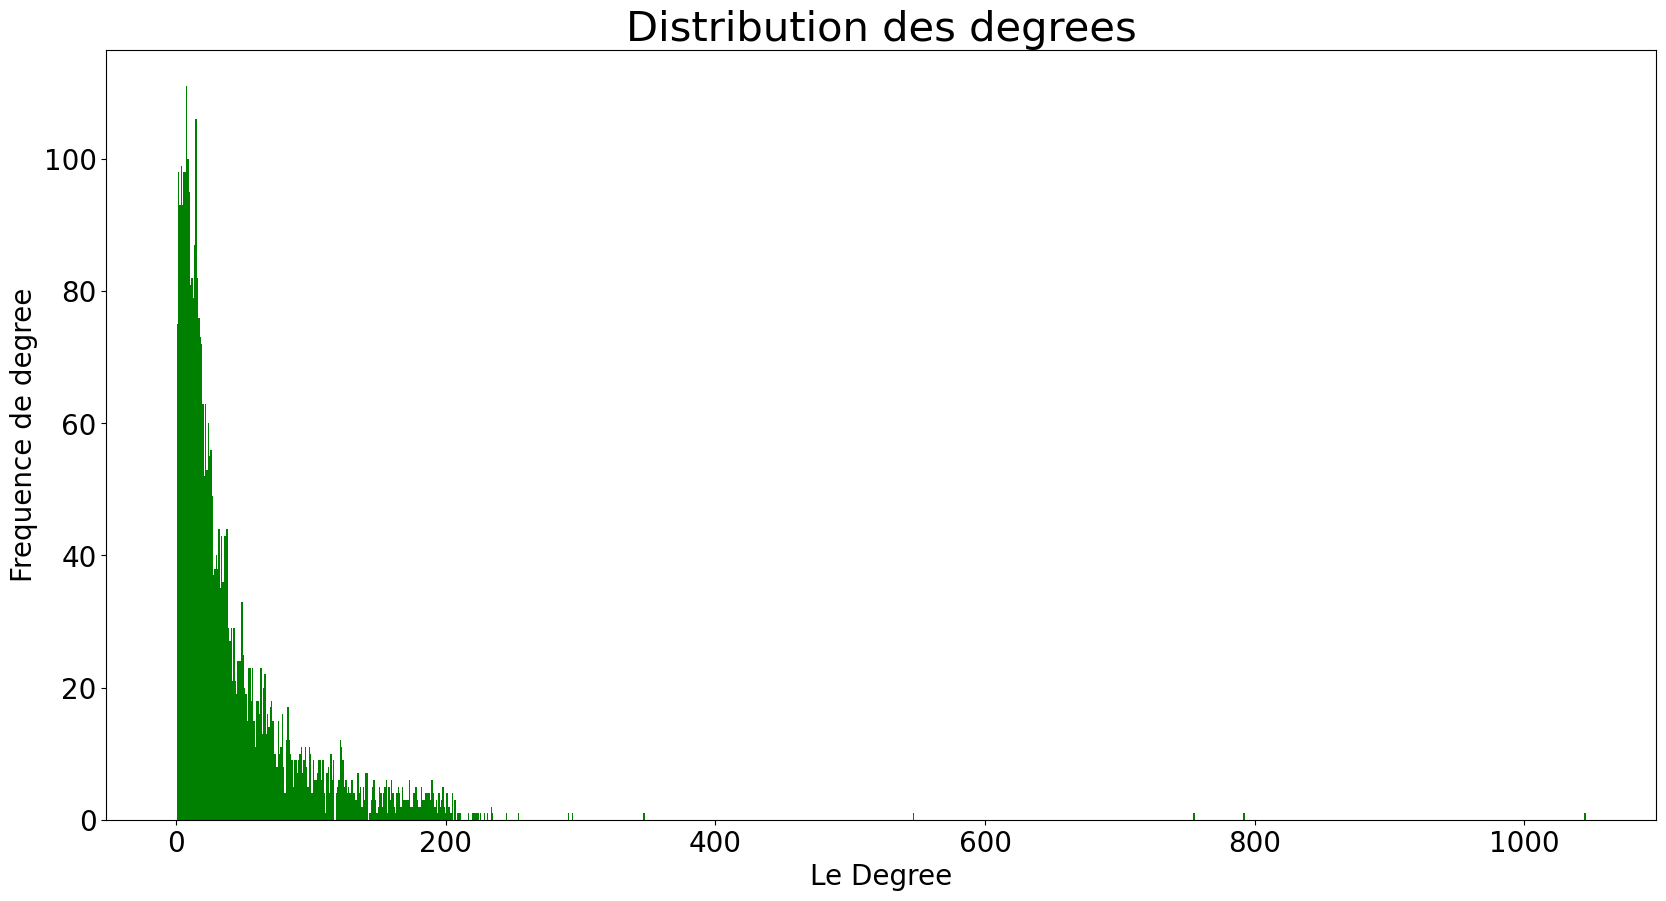

In [17]:
plt.figure(figsize=(20,10))
plt.bar(deg, count, width=1, color = "g")
plt.xlabel("Le Degree", fontsize = 20)
plt.ylabel("Frequence de degree", fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Distribution des degrees", fontsize=30)

<p> Sur ce gaphe on vois la distibution des degrees de notre graph. il y a des personne qui on d'important nombre d'amis, mais ne sont pas en grand nombre. Le degré le plus fréquent se situe entre 0 et 200 si on le prend comme ca. </p>

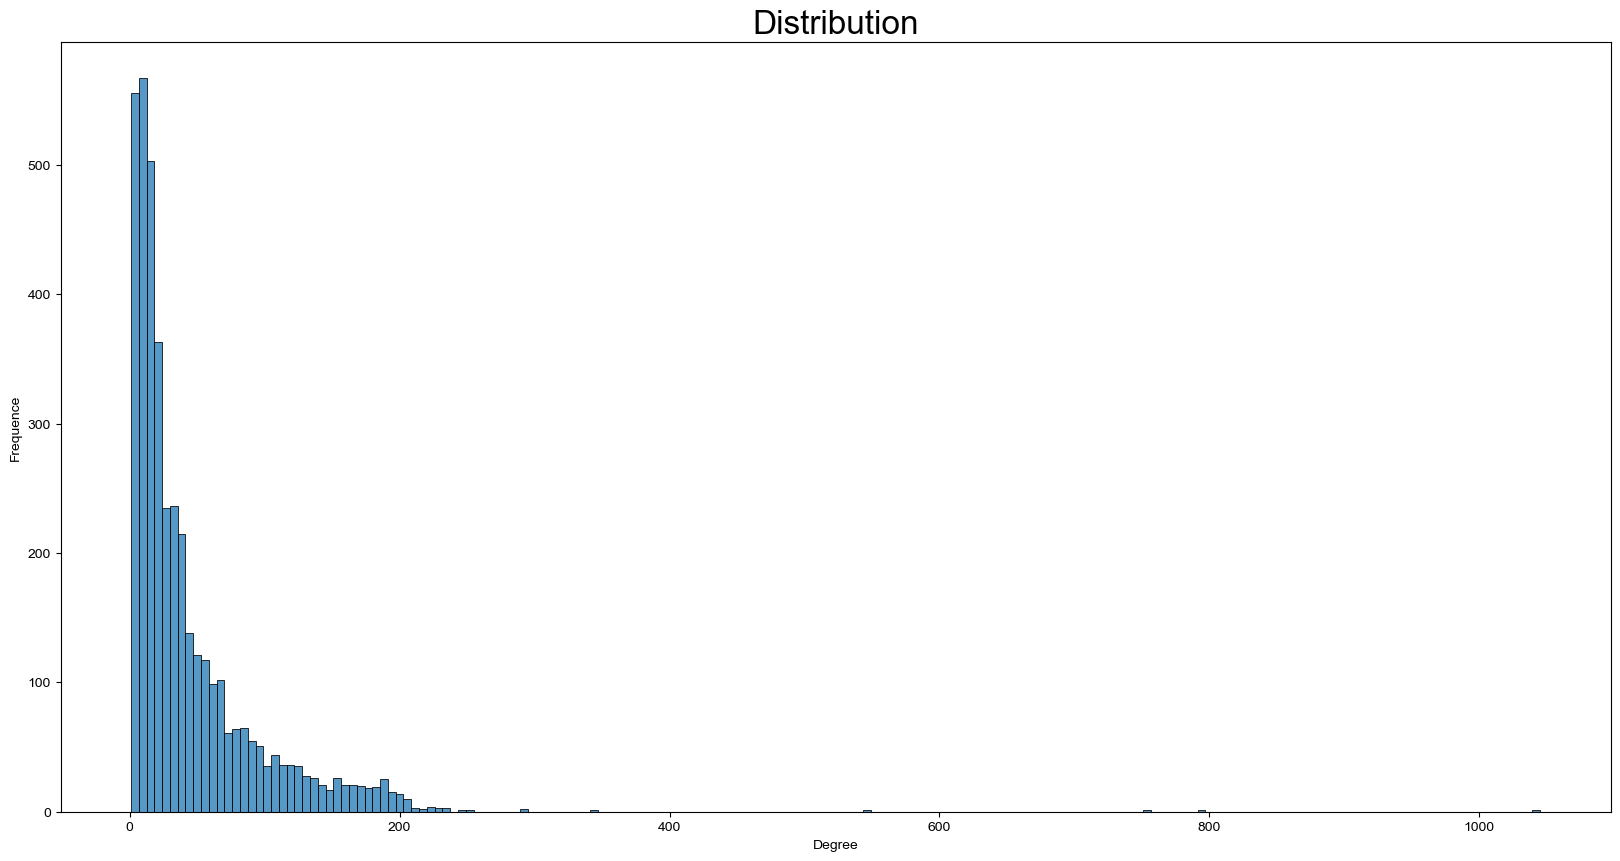

In [18]:
plt.figure(figsize=(20,10))
ax = sb.histplot(degree_sequences)
sb.set(font_scale = 2)
ax.set(xlabel = "Degree", ylabel = "Frequence", title = "Distribution")
plt.show()

/opt/anaconda3/envs/dataDibe/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/dataDibe/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Nodes degree size'),
 Text(0, 0.5, 'Frequence'),
 Text(0.5, 1.0, 'Degree Distribution')]

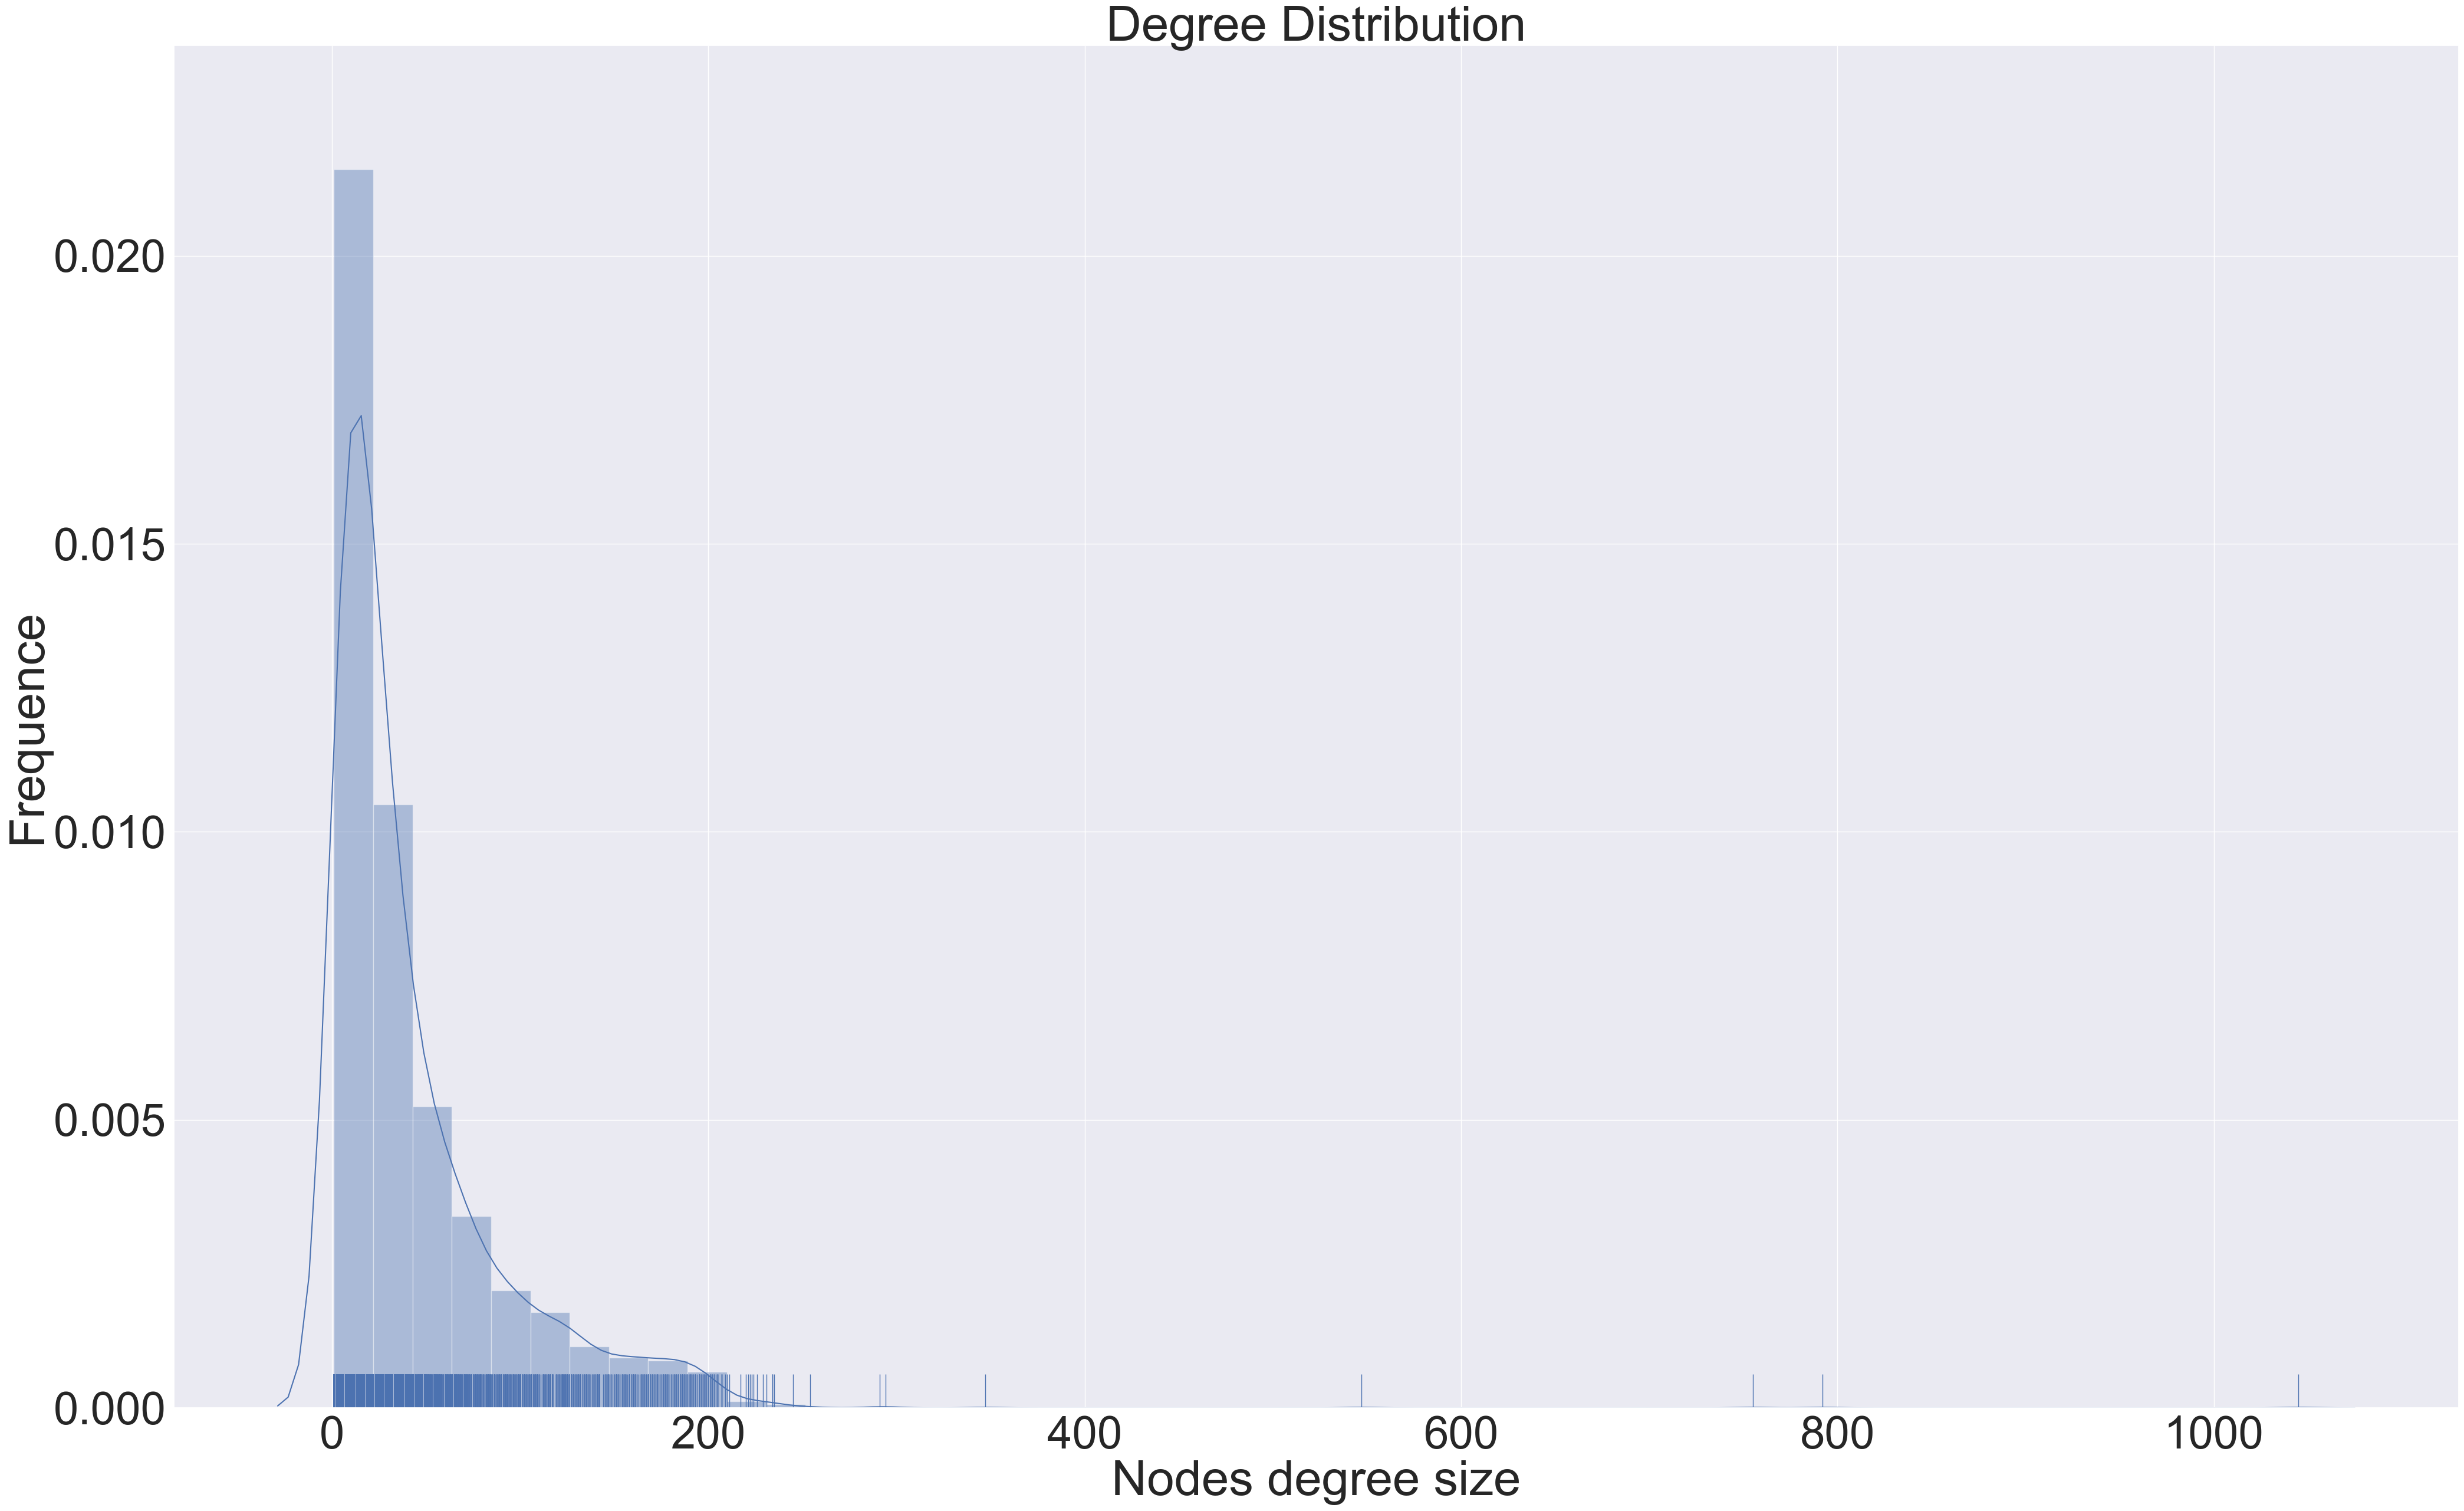

In [19]:
plt.figure(figsize=(50,30))
sb.set(font_scale = 5)
ax = sb.distplot(degree_sequences, rug = True)
ax.set(xlabel = "Nodes degree size", ylabel = "Frequence", title = "Degree Distribution")

## II- Modelisation 

<p>On va definir un modele qui etablie une raltion entre un degree et sa probabilité, dans le donnée qu'on dispos, supposons un individu quelconque, quelle est la probabilité que son nombre d'amis sont $y_i$, le modele que nous allons utilisé est celui de loi de puissance, avant d'établir le model fesons un tous sur la loi de puissance</p>

### Loi de puissance 

<p>
   Si dessus est la distribution du nombre nombre d'amis de notre donnée sur facebook. On va modéliser le nombres d'amis et sa probabilité. Un modelise utilisé le plus souvent dans les reseau sociaux est la loi de puissance. Dans notre etude on va utilisé cette loi pour modéliser le degré leur probabilité. Vous pouvez avoir plus d'information sur cette loi via ce lien <a href = "https://en.wikipedia.org/wiki/Power_law">.</a><br>
    <h4> Loi de puissance discret </h4> 
    <p> La formule de la loi de puissance discrete est la suivant où $k_{min}$ est la valeur minimum que peut prendre la variable aléatoire et $k$ la variable aléatoire: </p>
    <div style = "text-align:center"> $p(k) = \frac{\alpha-1}{k_{min}}.(\frac{k}{k_{min}})^{-\alpha}$</div>
</p>

<ul>
    <li>$\alpha$ la puissance de la distribution</li>
    <li> $k_{min}$ le minimum du degree sur le quelle la loi de puissance est appliquée</li>
</ul>
<p> On peut rendre cette fonction linéaire en appliquant la fonction logarithme</p>

<p>
 <div style = "text-align:center"> $log(p(k)) = log(\frac{\alpha-1}{k_{min}}) - \alpha.log(\frac{k}{k_{min}})$</div>
</p>

<p style = "align-items:center"> 
    on aura une equation linéaire : $y = a x + b$ où
  <div> $y = \log({p(k)})$</div>
  <div> $x = \log({\frac{k}{k_{min}}})$</div>
  <div> $a = -\alpha$</div>
  <div> $b = \log({\frac{\alpha - 1}{k_{min}}})$</div>
</p>

## Application de la loi de puissance 

#### Préparation pour l'application

Text(0.5, 1.0, 'Distribution de la frequence, (Application du Logarithme)')

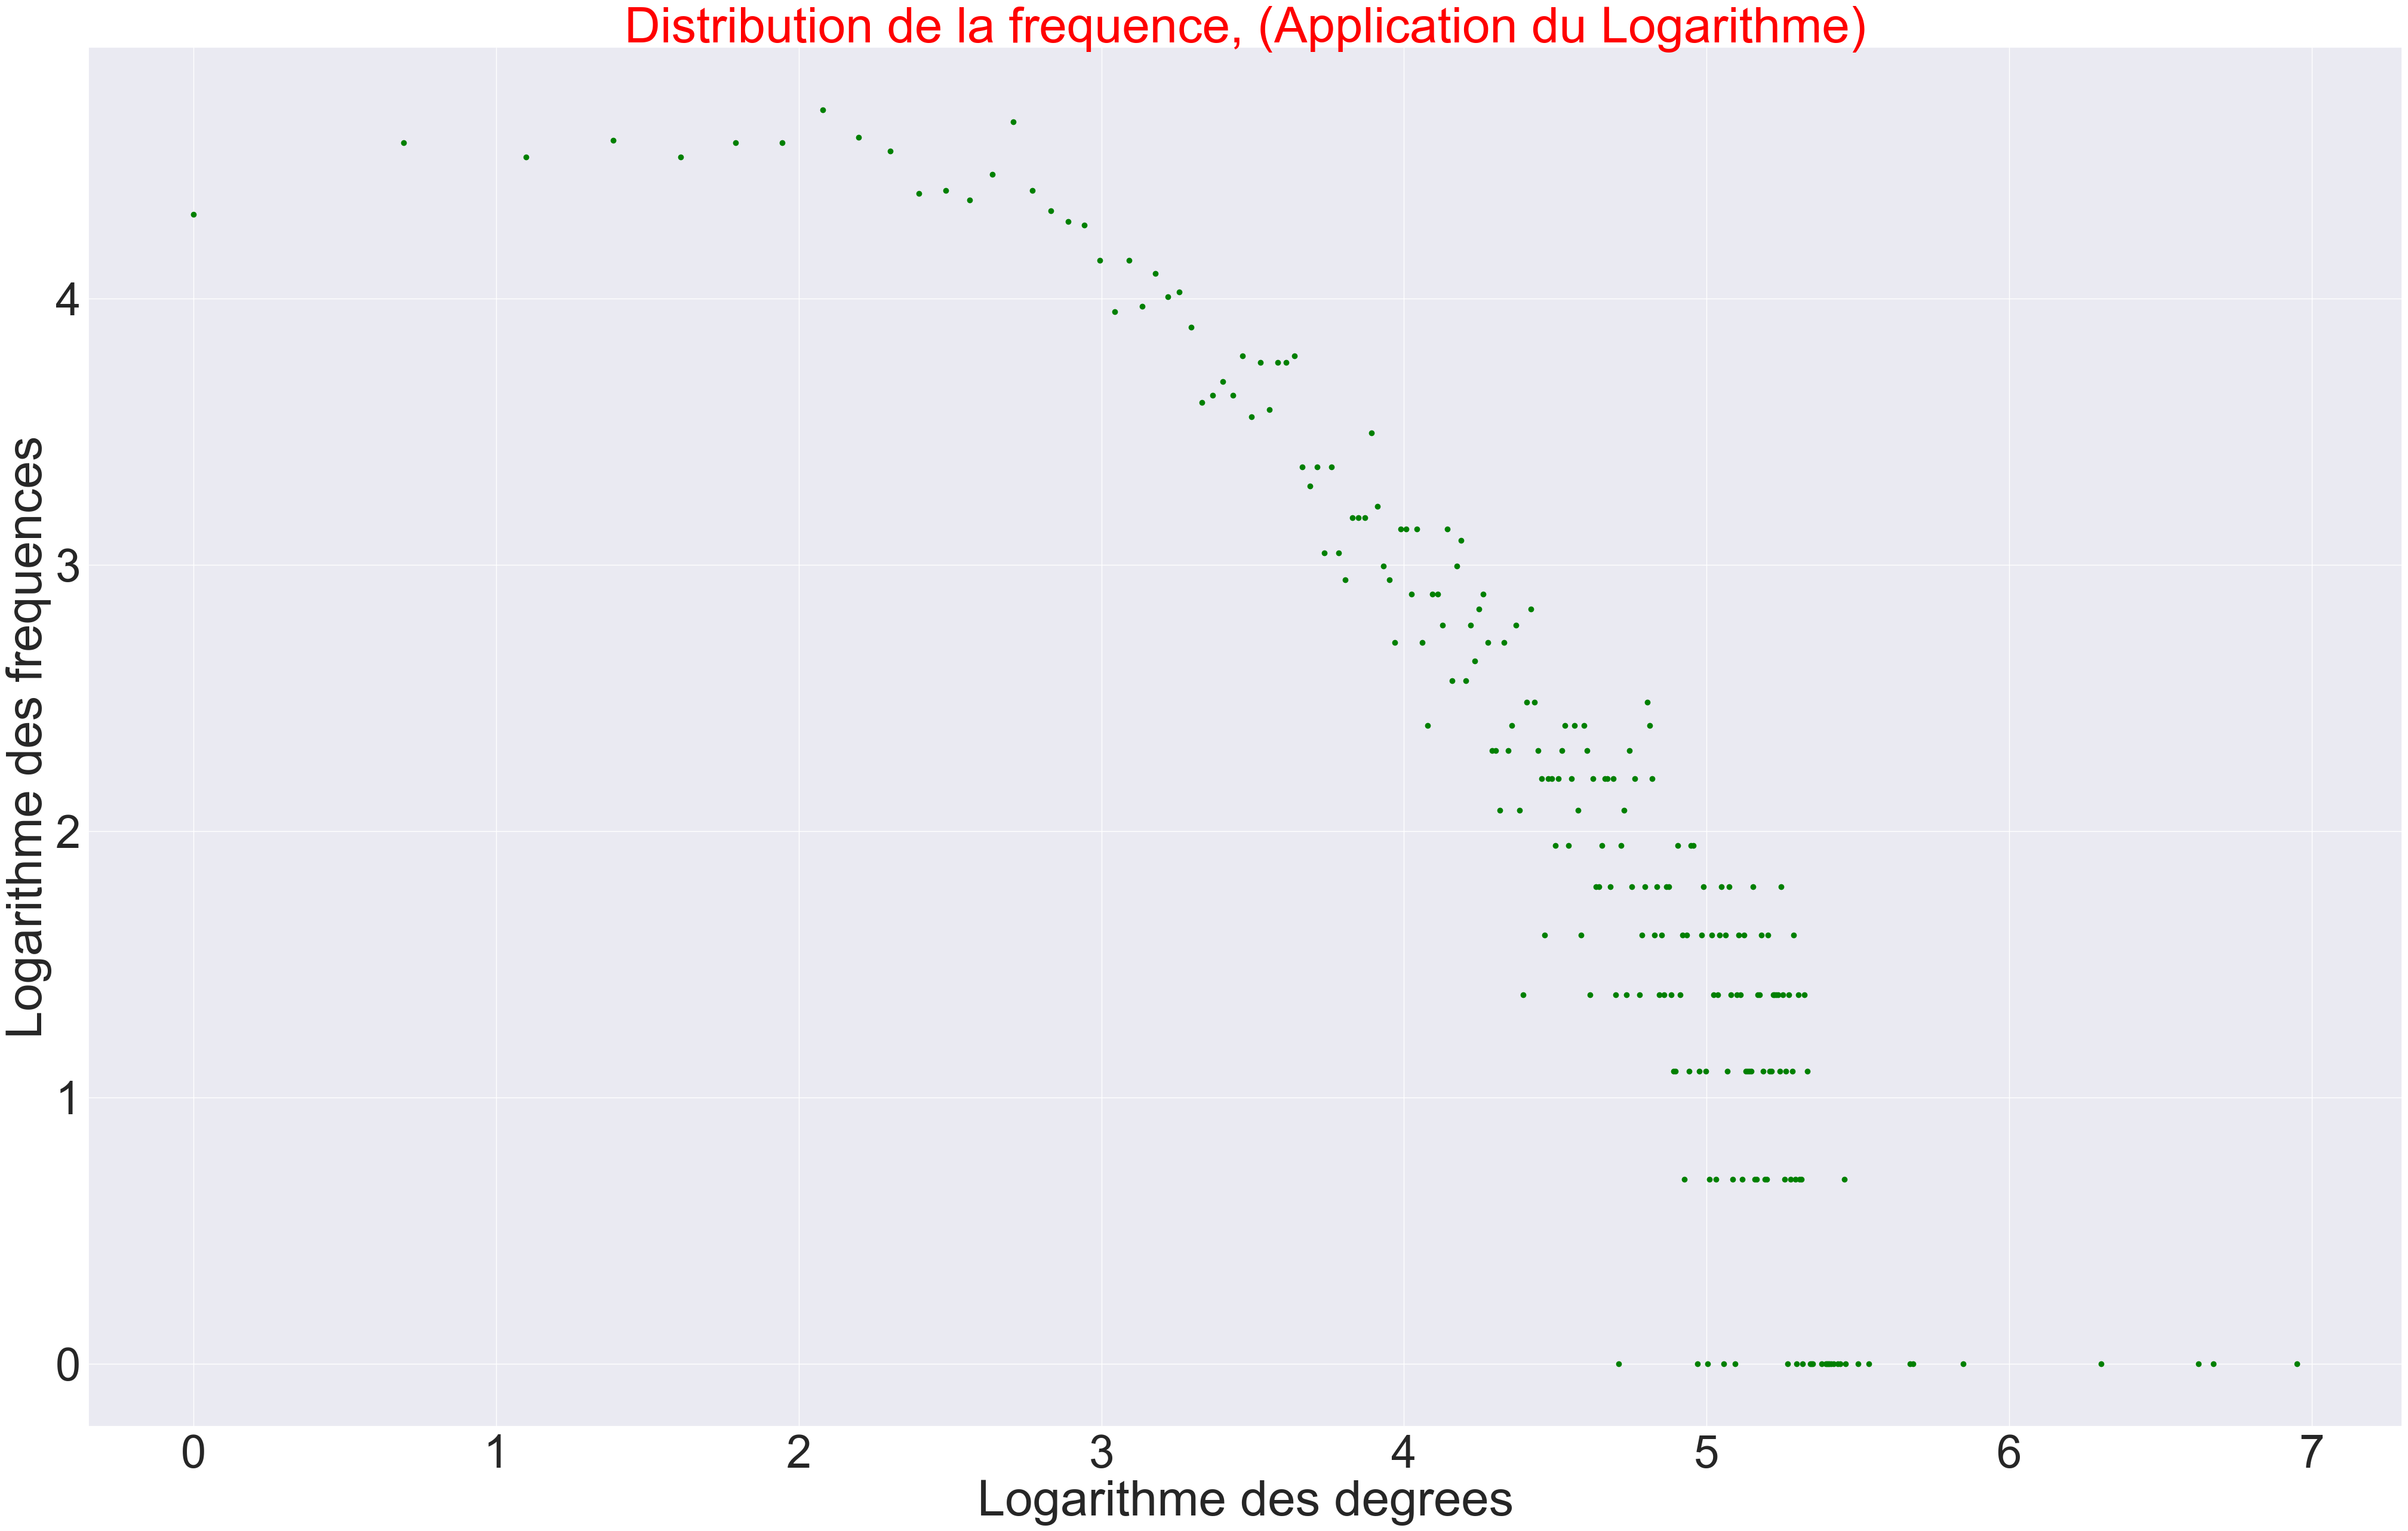

In [20]:
log_degree = np.log(deg)
log_count = np.log(count)

plt.figure(figsize=(50, 30))
plt.scatter(log_degree, log_count, color = "green")
plt.xlabel("Logarithme des degrees")
plt.ylabel("Logarithme des frequences")
plt.title("Distribution de la frequence, (Application du Logarithme)", color = "red")

In [21]:
type(count)

tuple

<p> count est sous forme de tuple de python, il nous serait plus facile de le manipuler sous forme de liste </p>

In [22]:
count_liste = list(count)

<p> on va maintenant calculer le probabilite pour chaque degrée mais avant </p>

In [23]:
sommes = sum(count[:-1])  # on ne va pas tenir count ici du degrée = 1
sommes

3964

In [24]:
prob_degree = [count[i]/sommes for i in range(len(count)-1)]

In [25]:
print(len(prob_degree))
print(len(deg))

226
227


#### Application

In [26]:
k_min = 2
log_degree = [np.log(deg[i]/k_min) for i in range(len(deg) - 1)] 
frequence = np.log(prob_degree)
X = pd.DataFrame({'log_degree':log_degree}, columns=["log_degree"])
print(len(log_degree))
print(len(frequence))

226
226


In [27]:
lm = skll.LinearRegression()
model = lm.fit(X, frequence)

In [28]:
model_parameter = [model.coef_[0], model.intercept_]
model_parameter

[-1.244820113441891, -1.5324561967970896]

In [29]:
alpha = -model_parameter[0]
intercept = model_parameter[1]

In [30]:
intercept_theo = np.log((alpha-1)/k_min)
print("Intercept du model:", intercept)
print("Intercept therorique en utilisant l'alpha estimé:", intercept_theo)
print("L'erreur est dans ce cas: {0}".format(round((-intercept+intercept_theo)/intercept_theo*100,1)))


Intercept du model: -1.5324561967970896
Intercept therorique en utilisant l'alpha estimé: -2.1003787495262625
L'erreur est dans ce cas: 27.0


In [31]:
from sklearn.metrics import mean_squared_error as mse
y_predict = model.predict(X)
error = mse(frequence, y_pred=y_predict)
print(error)

0.2880462893401386


<hr>